#### Import

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from rpy2 import robjects
from rpy2.robjects.packages import importr
from rpy2.robjects import vectors
from scipy.stats import norm
stats = importr('stats')

from scipy.stats import gaussian_kde

#### Data

In [36]:
df = pd.read_csv('cow_ssba.csv')
x = df['start_dates'].to_numpy().astype('float')
z = df['battle_deaths'].to_numpy().astype('float')
y = np.log(z)
n = len(x)

#### Functions

In [37]:
# Function for computing bandwidth, gives precisely the same as R
def bw_nrd0(data):
    if len(data) < 2:
        raise ValueError("Need at least 2 data points")
    
    hi = np.std(data)
    lo = min(hi, (np.percentile(data, 75) - np.percentile(data, 25)) / 1.34) if hi else hi or abs(data[0]) or 1.0
    
    return 0.9 * lo * len(data)**(-0.2)


def get_phi(x):
    return np.exp(-x**2 / 2) / np.sqrt(2*np.pi)


# Kernel density estimation from scratch
def custom_KDE(data, n):
    def f(arg):
        # arg a single point
        h = bw_nrd0(data)
        return np.mean(get_phi((arg - data) / h)) / h
    return f


# Kernel density estimation from scratch
def custom_KDE2(data, n):
    def f(arg):
        # arg a single point
        h = bw_nrd0(data)
        return np.mean(get_phi((arg - data) / h)) / h
    return f


def R_density(data):
    def f(arg):
        column = vectors.FloatVector(list(data))
        output = stats.density(column, n=512)
        xx = np.array(output[0])
        yy = np.array(output[1])
        
        index = np.argmin(np.abs(xx - arg))
        return yy[index]
    return f

In [38]:
f = custom_KDE(y, n)
f = np.vectorize(f)

g = R_density(y)
g = np.vectorize(g)

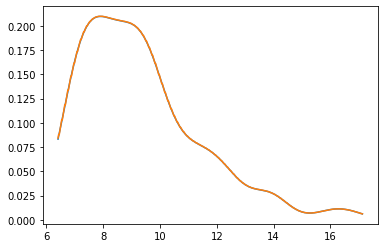

In [39]:
mplot = 500
space = np.linspace(np.min(y) - .5, np.max(y) + .5, mplot)

plt.plot(space, f(space))
plt.plot(space, g(space))
plt.show()

In [45]:
custom_KDE(y, n)(12.4)

0.05329075758146676

In [46]:
bww = bw_nrd0(y) / np.std(y, ddof=1)
gaussian_kde(y, bw_method=bww)(12.4)

array([0.05329076])